In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [60]:
a=np.load("topview_1.npy")
b=np.load("topview_2.npy")

In [ ]:
def compare(a, b):
    n=min(len(a), len(b))
    maxlen=0
    num=-1
    for i in range(1, n+1, 10):
        end_shape=a[-i:]
        start_shape=b[:i]
        x, y=end_shape[0]
        w, z=start_shape[0]
        shift_x=x-w
        shift_y=y-z
        start_shape_transformed=start_shape+np.array([shift_x, shift_y])
        
        # Compute Euclidean distances
        distances=np.linalg.norm(end_shape-start_shape_transformed, axis=1)
        threshold=5
        if np.all(distances<=threshold):
            print(f"The end of array1 matches the start of array2 within a threshold of {threshold}.")
            if(i>maxlen):
                maxlen=i
                num=i
        else:
            print(f"The shapes do not match within the threshold of {threshold}.")

        # Print distances for debugging
        print("Distances:", distances)
    print("The value of num is: ", num)
    b=b[num:]
    return a, b


In [62]:
a, b=compare(a, b)

The end of array1 matches the start of array2 within a threshold of 5.
Distances: [0.]
The shapes do not match within the threshold of 5.
Distances: [ 0.          8.62215851 15.11094413 17.79516918 18.55775295 19.39201686
 18.41161506 15.89549186 15.92116381 10.03935366  7.65416736]
The shapes do not match within the threshold of 5.
Distances: [ 0.          5.2576364  13.00657607 12.20785447 13.68220211 12.69540966
 16.08077452 22.22006286 22.95389345 29.51882048 34.0338213  26.99051143
 21.19278676 12.81843954  7.87165844  3.98012125  7.25779806  7.35674981
 13.75853408 12.71566408 14.43855288]
The shapes do not match within the threshold of 5.
Distances: [ 0.          2.18323169  5.46880034  2.59547225  2.78946829  4.85074121
  7.89486139 14.99709867 16.3691313  22.06108051 27.69605555 23.83466697
 19.54159184 18.34463975 19.71421173 18.89768935 21.45711407 22.78662665
 25.54563014 29.52134258 31.25442473 30.04879792 28.20263324 26.65365439
 23.07322235 11.55737718 11.06343853  9.561

In [63]:
# Get the last point of a and the first point of b
x, y=a[-1]
w, z=b[0]

# Calculate the coordinate transformation (shift)
shift_x=x-w
shift_y=y-z

# Apply the transformation to all points in b
b_transformed=b+np.array([shift_x, shift_y])

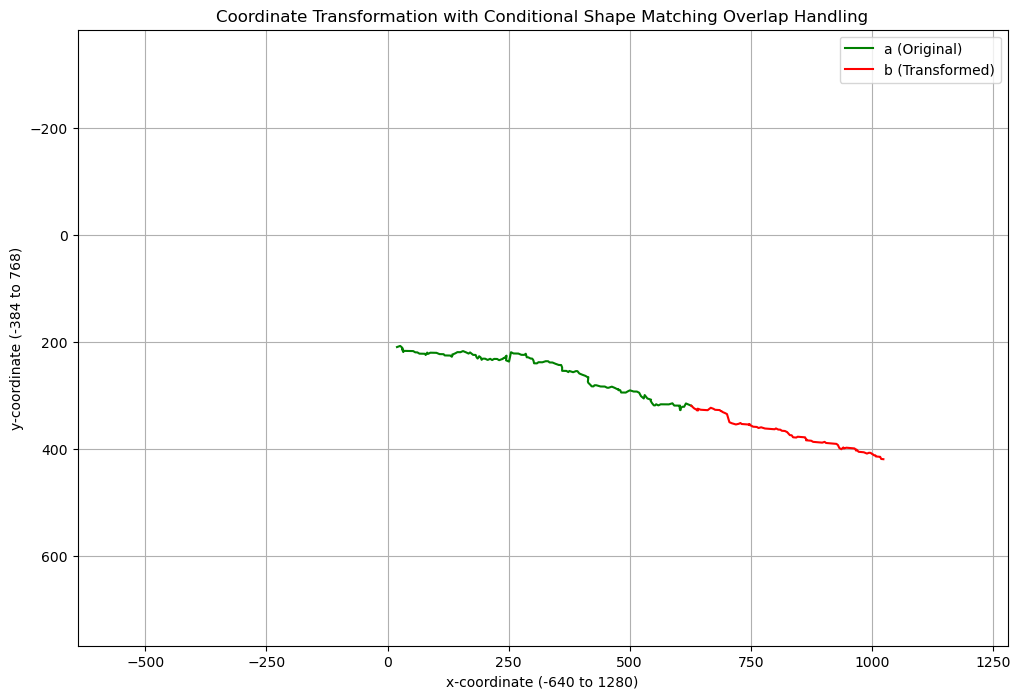

Transformation applied: shift_x=603.45948621, shift_y=210.88235465999998


In [64]:
# Plot the arrays
plt.figure(figsize=(12, 8))
plt.plot(a[:, 0], a[:, 1], color='green', label='a (Original)')
plt.plot(b_transformed[:, 0], b_transformed[:, 1], color='red', label='b (Transformed)')
plt.xlim(-640, 1280)
plt.ylim(-384, 768)
plt.legend()
plt.title('Coordinate Transformation with Conditional Shape Matching Overlap Handling')
plt.xlabel('x-coordinate (-640 to 1280)')
plt.ylabel('y-coordinate (-384 to 768)')
plt.gca().invert_yaxis()  # Invert y-axis for portrait orientation
plt.grid(True)
plt.show()

# Print transformation details
print(f"Transformation applied: shift_x={shift_x}, shift_y={shift_y}")


In [65]:
def rotate_points(points, angle_deg, origin):
    angle_rad=np.deg2rad(angle_deg)
    cos_theta=np.cos(angle_rad)
    sin_theta=np.sin(angle_rad)
    
    # Rotation matrix
    rotation_matrix=np.array([
        [cos_theta, -sin_theta],
        [sin_theta, cos_theta]
    ])
    
    # Translate points to the origin (a, b)
    translated_points=points-origin
    rotated_points=np.dot(translated_points, rotation_matrix.T)
    final_points=rotated_points+origin
    
    return final_points

# Rotate all points in 'a' by 60 degrees around the point (500, 500)
rotated_b=rotate_points(b, angle_deg=25, origin=np.array([611.15345205, 212.88844794]))

In [66]:
# Get the last point of a and the first point of b
x, y=a[-1]
w, z=rotated_b[0]

# Calculate the coordinate transformation (shift)
shift_x=x-w
shift_y=y-z

# Apply the transformation to all points in b
rotated_b=rotated_b+np.array([shift_x, shift_y])

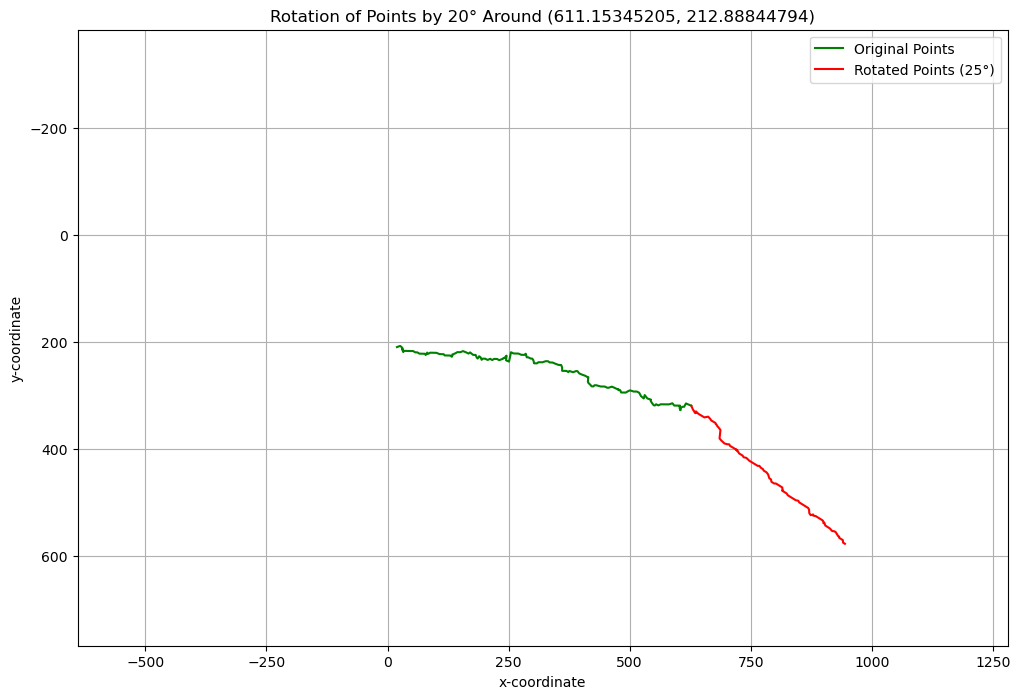

In [ ]:
# Plot the original and rotated arrays
plt.figure(figsize=(12, 8))
plt.plot(a[:, 0], a[:, 1], 'green', label='Original Points')
plt.plot(rotated_b[:, 0], rotated_b[:, 1], 'red', label='Rotated Points (25°)')
plt.xlim(-640, 1280)
plt.ylim(-384, 768)
plt.legend()
plt.title('Rotation of Points by 25° Around (611.15345205, 212.88844794)')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.gca().invert_yaxis()  # Invert y-axis for portrait orientation
plt.grid(True)
plt.show()

In [68]:
rotate_1=rotate_points(a, angle_deg=15, origin=np.array([0,200]))
rotate_2=rotate_points(rotated_b, angle_deg=15, origin=np.array([0,200]))

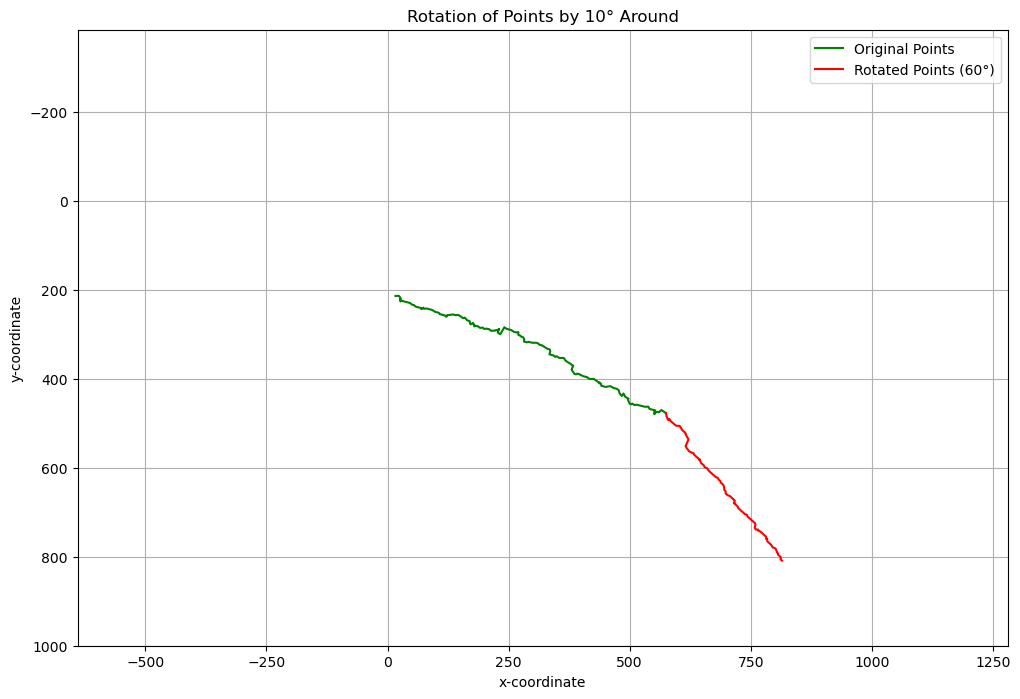

In [69]:
# Plot the original and rotated arrays
plt.figure(figsize=(12,8))
plt.plot(rotate_1[:, 0], rotate_1[:, 1], 'green', label='Original Points')
plt.plot(rotate_2[:, 0], rotate_2[:, 1], 'red', label='Rotated Points (60°)')
plt.xlim(-640, 1280)
plt.ylim(-384, 1000)
plt.legend()
plt.title('Rotation of Points by 10° Around')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.gca().invert_yaxis()  # Invert y-axis for portrait orientation
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


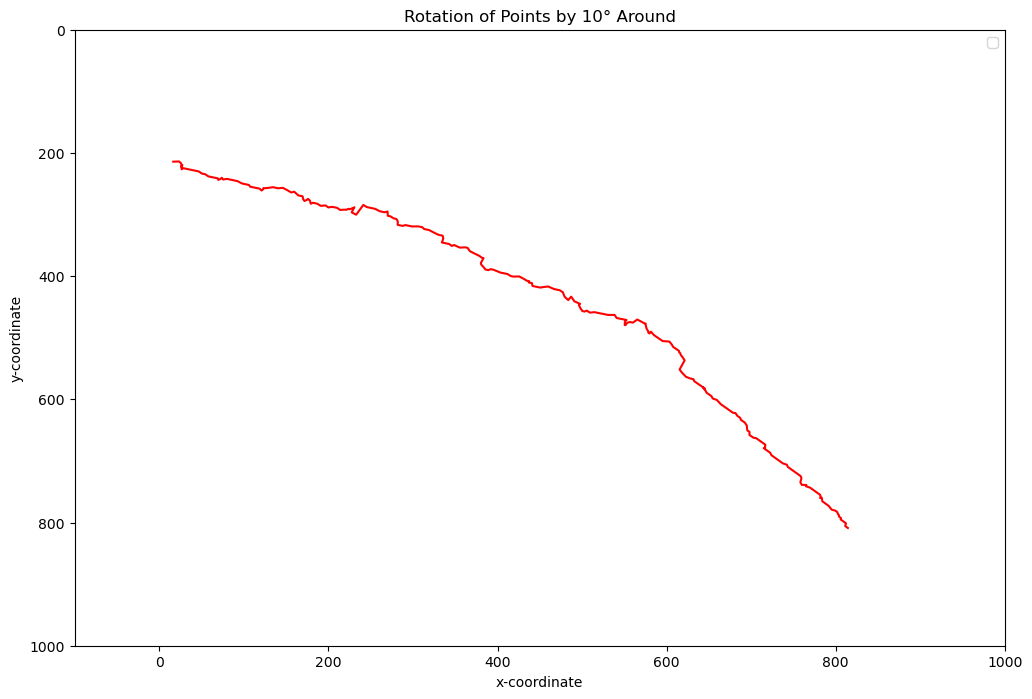

In [70]:
# Plot the original and rotated arrays
plt.figure(figsize=(12,8))
plt.plot(rotate_1[:, 0], rotate_1[:, 1], 'r')
plt.plot(rotate_2[:, 0], rotate_2[:, 1], 'r')
plt.xlim(-100, 1000)
plt.ylim(0, 1000)
plt.legend()
plt.title('Rotation of Points by 10° Around')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.gca().invert_yaxis()
plt.show()

In [71]:
arr_combined=np.concatenate((rotate_1, rotate_2), axis=0)  # Row-wise
np.save('test_points.npy', arr_combined)